In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import re
from collections import Counter
from nltk.corpus import stopwords
import nltk
from sklearn.metrics import jaccard_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import classification_report , roc_curve, f1_score, accuracy_score, recall_score , roc_auc_score,make_scorer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix,mean_squared_error,precision_score,recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier
import warnings
from sklearn.linear_model import LogisticRegression
from wordcloud import WordCloud
from tashaphyne.stemming import ArabicLightStemmer
from sklearn.svm import LinearSVC

warnings.filterwarnings("ignore")

warnings.filterwarnings("ignore", category=RuntimeWarning)

In [2]:
df1 = pd.read_csv('stories_art-et-culture.csv', encoding='utf8')
df2 = pd.read_csv('stories_economie.csv', encoding='utf8')
df3 = pd.read_csv('stories_faits-divers.csv', encoding='utf8')
df4 = pd.read_csv('stories_marocains-du-monde.csv', encoding='utf8')
df5 = pd.read_csv('stories_medias.csv', encoding='utf8')
df6 = pd.read_csv('stories_orbites.csv', encoding='utf8')
df7 = pd.read_csv('stories_politique.csv', encoding='utf8')
df8 = pd.read_csv('stories_regions.csv', encoding='utf8')
df9 = pd.read_csv('stories_societe.csv', encoding='utf8')
df10 = pd.read_csv('stories_sport.csv', encoding='utf8')
df11 = pd.read_csv('stories_tamazight.csv', encoding='utf8')

In [3]:
# List of dataframes
dfs = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11]

In [4]:
# Concatenate all dataframes into one dataframe
final_df = pd.concat(dfs, ignore_index=True)

In [5]:
final_df

,Unnamed: 0,id,title,date,author,story,topic
0,0,f06aa998054e11eba66e646e69d991ea,"""بيت الشعر"" يسائل وزير الثقافة عن كوابيس سوداء",الجمعة 02 أكتوبر 2020 - 23:19,هسبريس من الرباط,"وجه ""بيت الشعر في المغرب"" إلى وزير الثقافة وال...",art-et-culture
1,1,f1cf1b9c054e11ebb718646e69d991ea,"مهرجان ""سينما المؤلّف"" يستحضر روح ثريا جبران",الجمعة 02 أكتوبر 2020 - 07:26,هسبريس من الرباط,في ظلّ استمرار حالة الطوارئ الصحية المرتبطة بج...,art-et-culture
2,2,f2d282a4054e11eb800f646e69d991ea,"فيلم ""بدون عنف"" لهشام العسري ..""كعب الحذاء ووا...",الجمعة 02 أكتوبر 2020 - 04:00,عفيفة الحسينات*,تشير مشاهدة فيلم قصير ضمن الثلاثية الأخيرة للم...,art-et-culture
3,3,f3f46cac054e11eba403646e69d991ea,"""تنين ووهان"" .. مريم أيت أحمد توقِّع أولى ""روا...",الجمعة 02 أكتوبر 2020 - 02:00,حاورَها: وائل بورشاشن,"مِن قَلب أيّام ""الحَجْر""، رأتِ النّورَ الفصول ...",art-et-culture
4,4,f50f0476054e11eba31b646e69d991ea,"مسكر يتخلّى عن دعم ""الوزارة"" بسبب ""الجمهور""",الخميس 01 أكتوبر 2020 - 19:40,هسبريس من الرباط,أعلن الفنان المغربيّ سعيد مسكر تخليه عن مبلغ ا...,art-et-culture
...,...,...,...,...,...,...,...
10995,995,75b0b940055811ebb2ff646e69d991ea,"نشطاء أمازيغ يدافعون عن ""الحقّ"" في استقبال إسر...",الثلاثاء 10 شتنبر 2013 - 02:00,هسبريس ـ ميمون أم العيد,دافع ناشطون أمازيغ استقبلوا أخيرا وفدا من الطل...,tamazight
10996,996,775c3440055811ebbc60646e69d991ea,شاعرة أمازيغية تعتصم بالمطار لرفض استمارتها بـ...,الاثنين 09 شتنبر 2013 - 08:20,هسبريس ـ عبد المغيث جبران,خاضت الشاعرة الأمازيغية ملكية مزان اعتصاما لمد...,tamazight
10997,997,78fea9ba055811eb9e32646e69d991ea,وفد إسرائيلي يزور المغرب ويلتقي نشطاء أمازيغ ب...,الثلاثاء 03 شتنبر 2013 - 16:24,هسبريس - ماجدة أيت لكتاوي,أدانت المنسقية الوطنية للمبادرة الطلابية ضد ال...,tamazight
10998,998,7a58d38c055811ebb9c9646e69d991ea,نقاش أمازيغيّ مؤنّث بطنجة يذكّر بكَوْن الحقوق ...,السبت 17 غشت 2013 - 10:30,هسبريس من طنجة,طالبت الناشطة الأمازيغية مريم الدمناتي بضرورة ...,tamazight


# Preprocessing

### Remove unnecessary columns

In [6]:
final_df.drop(columns=['Unnamed: 0',"id",'date','author'],inplace=True)

In [7]:
final_df.head(5)

,title,story,topic
0,"""بيت الشعر"" يسائل وزير الثقافة عن كوابيس سوداء","وجه ""بيت الشعر في المغرب"" إلى وزير الثقافة وال...",art-et-culture
1,"مهرجان ""سينما المؤلّف"" يستحضر روح ثريا جبران",في ظلّ استمرار حالة الطوارئ الصحية المرتبطة بج...,art-et-culture
2,"فيلم ""بدون عنف"" لهشام العسري ..""كعب الحذاء ووا...",تشير مشاهدة فيلم قصير ضمن الثلاثية الأخيرة للم...,art-et-culture
3,"""تنين ووهان"" .. مريم أيت أحمد توقِّع أولى ""روا...","مِن قَلب أيّام ""الحَجْر""، رأتِ النّورَ الفصول ...",art-et-culture
4,"مسكر يتخلّى عن دعم ""الوزارة"" بسبب ""الجمهور""",أعلن الفنان المغربيّ سعيد مسكر تخليه عن مبلغ ا...,art-et-culture


### Remove duplicated

In [8]:
final_df= final_df.drop_duplicates()

### Remove Punctuation

In [9]:
final_df.title=final_df.title.apply(lambda x:re.sub('[%s]' % re.escape("""!"#$%&'()*+,،-./:;<=>؟?@[\]^_`{|}~"""), ' ', x))
final_df.story=final_df.story.apply(lambda x:re.sub('[%s]' % re.escape("""!"#$%&'()*+,،-./:;<=>؟?@[\]^_`{|}~"""), ' ', x))

### remove stopwords

In [10]:
stop_words = set(stopwords.words('arabic'))

In [11]:

# Function to remove stopwords
def remove_stopwords(text):
    words = nltk.word_tokenize(text)
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

In [12]:
#Apply the function to the 'story','title' column 
final_df['story'] = final_df['story'].apply(remove_stopwords)
final_df['title'] = final_df['story'].apply(remove_stopwords)

### Remove numbers

In [13]:
final_df.title=final_df.title.apply(lambda x:''.join([word for word in x if not word.isdigit()]))
final_df.story=final_df.story.apply(lambda x:''.join([word for word in x if not word.isdigit()]))

### Apply Stemmer

In [14]:
#final_df.title=final_df.title.apply(lambda x : " ".join([ArabicLightStemmer().light_stem(word) for word in x.split()]))

In [15]:
#final_df.story=final_df.story.apply(lambda x : " ".join([ArabicLightStemmer().light_stem(word) for word in x.split()]))

# Apply TfidfVectorizer to get features

In [16]:
tfidf_dfs = {}
for col in final_df.columns:
   
    if col not in ['topic']:
       
        documents = final_df[col].tolist()
        tfidf_vectorizer = TfidfVectorizer(max_features=1000,ngram_range=(1, 2))
        tfidf_matrix = tfidf_vectorizer.fit_transform(documents)
        # Convert the TF-IDF matrix to a DataFrame
        tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
        tfidf_dfs[col] = tfidf_df


In [17]:
concatenated_tfidf_df = pd.concat(tfidf_dfs.values(), axis=1)
concatenated_tfidf_df

,آخر,آلاف,آيت,أثناء,أحمد,أخبار,أخبار اليوم,أخرى,أداء,أرض,...,يقوم,يكن,يكون,يمكن,ين,ينبغي,يوجد,يوليوز,يوم,يوما
0,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.054276,0.000000,0.000000,0.0,0.0,0.0,0.050048,0.0
1,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
2,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.066878,0.060742,0.000000,0.0,0.0,0.0,0.000000,0.0
3,0.10675,0.000000,0.0,0.0,0.139445,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.144794,0.000000,0.100716,0.315017,0.0,0.0,0.0,0.000000,0.0
4,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.101027,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10992,0.00000,0.046663,0.0,0.0,0.041742,0.0,0.0,0.085650,0.0,0.000000,...,0.0,0.043344,0.000000,0.030149,0.000000,0.0,0.0,0.0,0.000000,0.0
10993,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.234442,...,0.0,0.000000,0.083260,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
10994,0.00000,0.000000,0.0,0.0,0.190298,0.0,0.0,0.065078,0.0,0.000000,...,0.0,0.000000,0.075665,0.000000,0.214950,0.0,0.0,0.0,0.000000,0.0
10995,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.043951,0.0,0.071945,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0


In [18]:
label_encoder = LabelEncoder()
labels= label_encoder.fit_transform(final_df.topic)

## Split data into 80% train and 20% test

In [19]:
X=concatenated_tfidf_df
Y=labels

In [20]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=42,test_size=0.20,shuffle=True)

# Models

In [21]:
def get_accuracy(name, trained_model , x_train, y_train, x_test, y_test):
    tree_predict = trained_model.predict(x_test)
    print("Testing accuracy   :",accuracy_score(y_test, tree_predict)*100 , "%")
    print("MSE [TEST]          :",mean_squared_error(y_test, tree_predict))


    tree_predict1 = trained_model.predict(x_train)
    print("Training accuracy  :",accuracy_score(y_train, tree_predict1)*100 ,"%")
    print("MSE [TRAIN]         :",mean_squared_error(y_train, tree_predict1))

    print("precision : ",precision_score(y_test, tree_predict,average='micro'))
    print("recall    : ",recall_score(y_test, tree_predict,average='micro'))
    print("f1_score  : ",f1_score(y_test, tree_predict,average='micro'))


    cf1 = confusion_matrix(y_test,tree_predict)
    sns.heatmap(cf1,annot=True,fmt = '.0f')
    plt.xlabel('prediction')
    plt.ylabel('Actual')
    plt.title(name+ ' Confusion Matrix')
    plt.show()

    print("classification report for training data:\n",classification_report(y_train,  trained_model.predict(x_train)))
    print("classification report for testing data:\n",classification_report(y_test,  trained_model.predict(x_test)))

## Random Forest Classfier

Testing accuracy   : 79.13636363636364 %
MSE [TEST]          : 4.013181818181818
Training accuracy  : 100.0 %
MSE [TRAIN]         : 0.0
precision :  0.7913636363636364
recall    :  0.7913636363636364
f1_score  :  0.7913636363636364


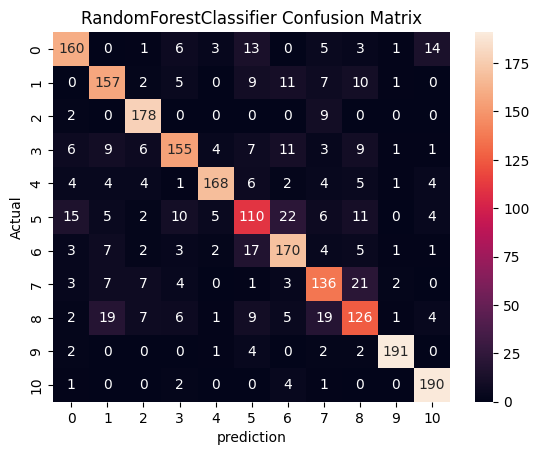

classification report for training data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       794
           1       1.00      1.00      1.00       797
           2       1.00      1.00      1.00       811
           3       1.00      1.00      1.00       788
           4       1.00      1.00      1.00       797
           5       1.00      1.00      1.00       809
           6       1.00      1.00      1.00       785
           7       1.00      1.00      1.00       815
           8       1.00      1.00      1.00       801
           9       1.00      1.00      1.00       798
          10       1.00      1.00      1.00       802

    accuracy                           1.00      8797
   macro avg       1.00      1.00      1.00      8797
weighted avg       1.00      1.00      1.00      8797

classification report for testing data:
               precision    recall  f1-score   support

           0       0.81      0.78      0.79      

In [22]:
RF_classifer=RandomForestClassifier(n_estimators=300)
RF_classifer.fit(x_train, y_train)
get_accuracy('RandomForestClassifier',RF_classifer,x_train, y_train, x_test, y_test)

## Naive_Bayes

Testing accuracy   : 76.86363636363637 %
MSE [TEST]          : 4.537272727272727
Training accuracy  : 80.17505967943617 %
MSE [TRAIN]         : 3.8248266454473114
precision :  0.7686363636363637
recall    :  0.7686363636363637
f1_score  :  0.7686363636363638


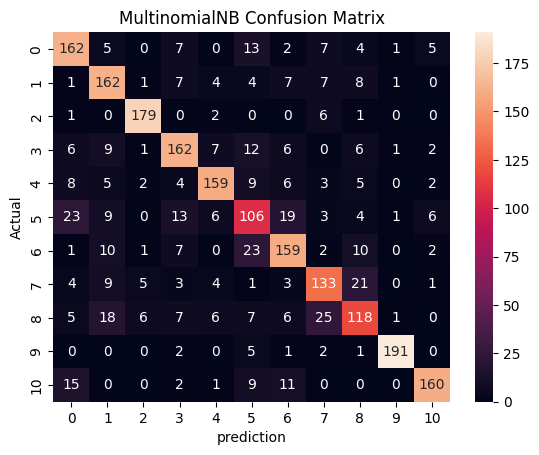

classification report for training data:
               precision    recall  f1-score   support

           0       0.70      0.86      0.77       794
           1       0.77      0.86      0.81       797
           2       0.92      0.93      0.92       811
           3       0.83      0.79      0.81       788
           4       0.84      0.75      0.79       797
           5       0.65      0.63      0.64       809
           6       0.75      0.76      0.75       785
           7       0.80      0.77      0.78       815
           8       0.69      0.62      0.65       801
           9       0.98      0.98      0.98       798
          10       0.91      0.88      0.89       802

    accuracy                           0.80      8797
   macro avg       0.80      0.80      0.80      8797
weighted avg       0.80      0.80      0.80      8797

classification report for testing data:
               precision    recall  f1-score   support

           0       0.72      0.79      0.75      

In [23]:
trained_clf_multinomial_nb = MultinomialNB().fit(x_train, y_train)
get_accuracy('MultinomialNB',trained_clf_multinomial_nb,x_train, y_train, x_test, y_test)

## LinearSVC

Testing accuracy   : 79.81818181818183 %
MSE [TEST]          : 3.623181818181818
Training accuracy  : 95.16880754802773 %
MSE [TRAIN]         : 0.8014095714448107
precision :  0.7981818181818182
recall    :  0.7981818181818182
f1_score  :  0.7981818181818182


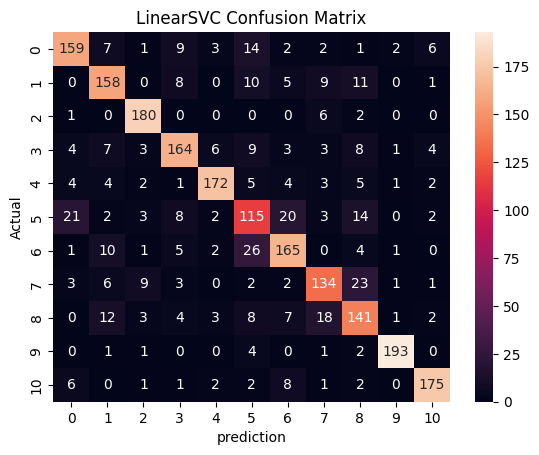

classification report for training data:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       794
           1       0.94      0.96      0.95       797
           2       0.98      0.99      0.99       811
           3       0.96      0.98      0.97       788
           4       0.98      0.97      0.98       797
           5       0.89      0.86      0.87       809
           6       0.91      0.92      0.92       785
           7       0.94      0.95      0.95       815
           8       0.91      0.89      0.90       801
           9       1.00      1.00      1.00       798
          10       0.99      0.99      0.99       802

    accuracy                           0.95      8797
   macro avg       0.95      0.95      0.95      8797
weighted avg       0.95      0.95      0.95      8797

classification report for testing data:
               precision    recall  f1-score   support

           0       0.80      0.77      0.79      

In [24]:
trained_clf_svc = LinearSVC(multi_class="ovr")
trained_clf_svc.fit(x_train, y_train)
get_accuracy('LinearSVC',trained_clf_svc,x_train, y_train, x_test, y_test)